In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from evar.workflow import EvarWorkflow, make_kfold_splits
from evar.data import COLUMN_NAMES
from evar.estimator_var import EVarCntxMngr
from evar.viz import plot_bin_pred_hist
import numpy as np
import pandas as pd


In [4]:
flow = EvarWorkflow()
flow.make_estimator_var()
var_data = flow.comp_var_data(n_splits=4, prob_bins=4)


In [21]:
var_data

,p_binid,y_score,p_estim,p_pred_id,y_test
0,1,0.927701,0.709677,0,1
1,0,0.000419,0.000000,0,0
2,0,0.011196,0.000000,0,0
3,2,0.997265,1.000000,0,1
4,2,0.999752,1.000000,0,1
...,...,...,...,...,...
183,0,0.028219,0.000000,3,0
184,0,0.001090,0.000000,3,0
185,0,0.043889,0.000000,3,0
186,1,0.486310,0.709677,3,1


In [5]:
var_data.groupby(level=0)[COLUMN_NAMES.binid].agg(set).astype('str')

0         {1}
1         {0}
2         {0}
3         {2}
4      {2, 3}
        ...  
183       {0}
184       {0}
185       {0}
186       {1}
187       {1}
Name: p_binid, Length: 188, dtype: object

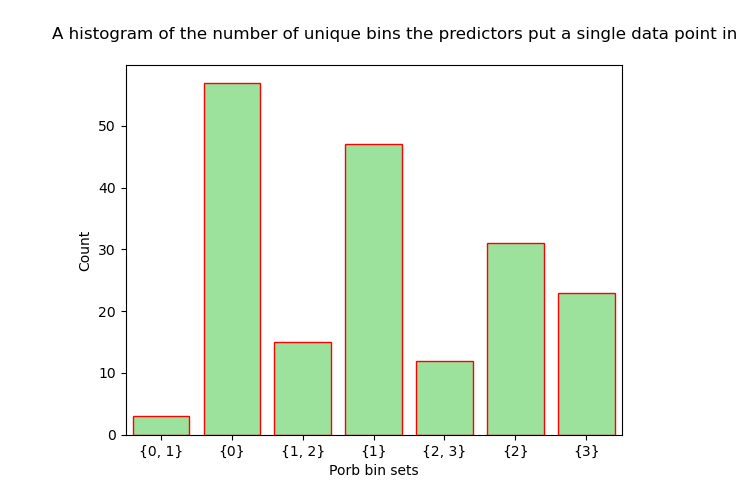

In [6]:
plot_bin_pred_hist(var_data)

In [8]:
with EVarCntxMngr(flow.evar, format_str="{0:.4f}") as ev:
    for i, cpp in enumerate(ev.prob_predictors):
        print(cpp._calibrate.info)

    p_estim      bin_interval
0  0.000000  [0.0000, 0.1284]
1  0.709677  [0.1284, 0.9942]
2  1.000000  [0.9942, 0.9998]
3  1.000000  [0.9998, 1.0000]
    p_estim      bin_interval
0  0.000000  [0.0000, 0.1726]
1  0.741935  [0.1726, 0.9927]
2  0.967742  [0.9927, 0.9994]
3  1.000000  [0.9994, 1.0000]
    p_estim      bin_interval
0  0.000000  [0.0000, 0.2194]
1  0.709677  [0.2194, 0.9885]
2  1.000000  [0.9885, 0.9991]
3  1.000000  [0.9991, 1.0000]
    p_estim      bin_interval
0  0.000000  [0.0000, 0.1283]
1  0.709677  [0.1283, 0.9908]
2  1.000000  [0.9908, 0.9992]
3  1.000000  [0.9992, 1.0000]
